In [31]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [32]:
# Reading Data
Ramen = pd.read_csv('ramen_rater.csv')

In [33]:
Ramen.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2323,Ogasawara,Kirin Giraffe Shio Ramen,Pack,Japan,5.0
1,2322,Sapporo Ichiban,Mie Kamayama Ramen Gyukotsu Misoaji,Bowl,Japan,2.5
2,2321,Sau Tao,Black Pepper XO Sauce Flavour,Bowl,Hong Kong,5.0
3,2320,Nissin,Nupasta Bolognese Flavour Instant Noodle,Cup,Japan,4.0
4,2319,Nongshim,Saeutang Sabalmyeon,Bowl,South Korea,3.5


In [34]:
#Finding the Ramen reviewed from different countries and found same values
Ramen['Country'].value_counts()

Japan            314
USA              299
South Korea      272
Taiwan           202
Thailand         188
China            152
Malaysia         148
Indonesia        119
Hong Kong        118
Vietnam          104
Singapore         78
UK                69
Philippines       47
Canada            41
India             22
Australia         21
Netherlands       15
Nepal             14
Myanmar           14
Germany           13
Mexico             9
Pakistan           8
Hungary            8
Colombia           6
Bangladesh         6
Cambodia           5
Brazil             5
Holland            4
Poland             4
Sarawak            3
Dubai              3
Sweden             3
Finland            3
Estonia            2
Fiji               2
United States      1
Name: Country, dtype: int64

In [35]:
# Found and replaced values that overlapped

Ramen['Country'].replace(
    to_replace='United States',
    value='USA',
    inplace=True
)

Ramen['Country'].replace(
    to_replace='Sarawak',
    value='Malaysia',
    inplace=True
)

Ramen['Country'].replace(
    to_replace='Holland',
    value='Netherlands',
    inplace=True
)

In [36]:
#Checking the number of products reviewed by Country
Ramen['Country'].value_counts()

Japan          314
USA            300
South Korea    272
Taiwan         202
Thailand       188
China          152
Malaysia       151
Indonesia      119
Hong Kong      118
Vietnam        104
Singapore       78
UK              69
Philippines     47
Canada          41
India           22
Australia       21
Netherlands     19
Nepal           14
Myanmar         14
Germany         13
Mexico           9
Pakistan         8
Hungary          8
Bangladesh       6
Colombia         6
Brazil           5
Cambodia         5
Poland           4
Dubai            3
Sweden           3
Finland          3
Estonia          2
Fiji             2
Name: Country, dtype: int64

In [37]:
#Checking the amount of products reviewed by brand
Ramen['Brand'].value_counts()

Nissin                  309
Nongshim                 92
Maruchan                 74
Mama                     71
Paldo                    62
Myojo                    61
Indomie                  50
Ottogi                   42
Lucky Me!                34
Vina Acecook             34
Samyang Foods            33
Vifon                    32
Mamee                    29
MAMA                     27
Master Kong              26
A-Sha Dry Noodle         26
Maggi                    26
Sapporo Ichiban          25
Wai Wai                  24
JML                      23
Ve Wong                  22
Samyang                  19
Koka                     18
Doll                     16
Batchelors               16
MyKuali                  16
Mr. Noodles              15
Kamfen                   14
Takamori Kosan           14
Asian Thai Foods         14
                       ... 
Nagatanien                1
S&S                       1
Dongwon                   1
Kumamoto                  1
Econsave            

In [38]:
# Creating a new column which will correspond to countries in the dataframe.

Asia = ['Japan','South Korea','Taiwan','Thailand','China','Malaysia','Indonesia','Hong Kong','Vietnam','Singapore','Philippines','India','Myanmar','Nepal','Pakistan','Bangladesh','Cambodia','Dubai']

Europe = ['UK','Netherlands','Germany','Hungary','Sweden','Finland','Estonia','Poland']

Americas = ['USA','Canada','Mexico','Colombia','Brazil']

Oceania = ['Australia','Fiji']

In [39]:
# Function which will fill in the continents

def continent_filter(Country):
    if Country in Asia:
        return 'Asia'
    elif Country in Europe:
        return 'Europe'
    elif Country in Americas:
        return 'Americas'
    else:
        return 'Oceania'

In [40]:
# Checking to see if it works
continent_filter('Japan')

'Asia'

In [41]:
continent_filter('Fiji')

'Oceania'

In [42]:
# Applying the function
Ramen['Continent'] = Ramen['Country'].apply(continent_filter)

In [43]:
Ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Continent
0,2323,Ogasawara,Kirin Giraffe Shio Ramen,Pack,Japan,5.0,Asia
1,2322,Sapporo Ichiban,Mie Kamayama Ramen Gyukotsu Misoaji,Bowl,Japan,2.5,Asia
2,2321,Sau Tao,Black Pepper XO Sauce Flavour,Bowl,Hong Kong,5.0,Asia
3,2320,Nissin,Nupasta Bolognese Flavour Instant Noodle,Cup,Japan,4.0,Asia
4,2319,Nongshim,Saeutang Sabalmyeon,Bowl,South Korea,3.5,Asia


In [44]:
# Number of products reviewed by Continent
Ramen['Continent'].value_counts()

Asia        1817
Americas     361
Europe       121
Oceania       23
Name: Continent, dtype: int64

In [35]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go

In [36]:
fig = {
  "data": [
    {
      "values": [1817,361,121,23],
      "labels": [
        "Asia",
        "Americas",
        "Europe",
        "Oceania",
      ],
      "text":"Continent",
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": [314,300,272,202,188,152,151,119,118,104,402],
      "labels": [
        "Japan",
        "USA",
        "South Korea",
        "Taiwan",
        "Thailand",
        "China",
        "Malaysia",
        "Indonesia",
        "Hong Kong",
        "Vietnam",
        "Rest of world",
      ],
      "text":"Country",
      "textposition":"inside",
      "domain": {"x": [.49, 1]},
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Ramen Reviewed",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Continent",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Country",
                "x": .8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)

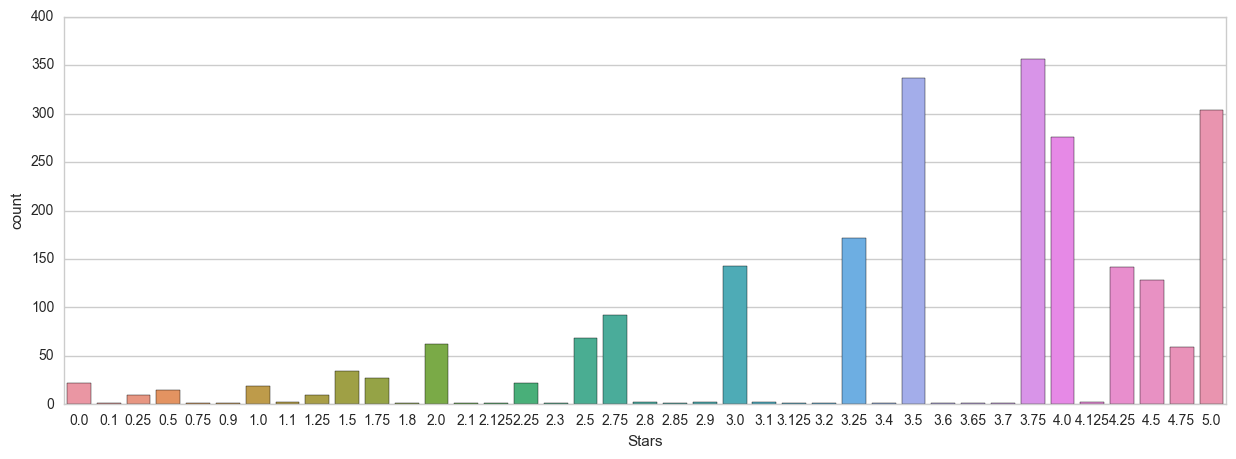

In [17]:
plt.rcParams['figure.figsize']=15,5
ax = sns.countplot(x="Stars", data=Ramen)

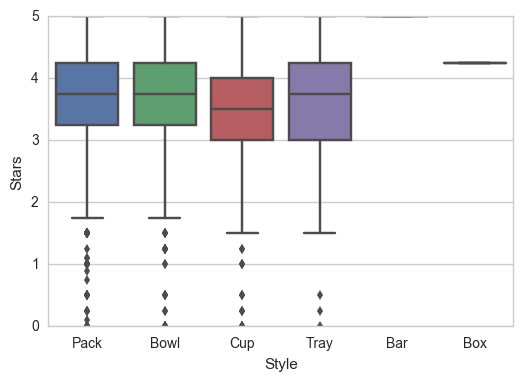

In [45]:
# Plotting the ratings by Style

sns.boxplot(x="Style", y="Stars", data=Ramen)

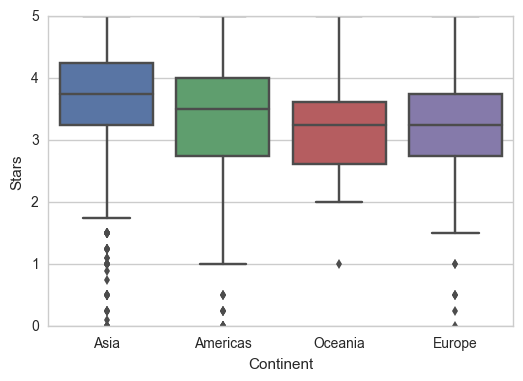

In [46]:
#Plotting the Ratings by Continent
sns.boxplot(x="Continent", y="Stars", data=Ramen)

In [47]:
# Created a dataframe for each Continent in order to create
# a boxplot to see which countries had the best rating in each Continent.
r_asia =(Ramen['Continent'] == 'Asia')
rasia = Ramen[r_asia]

r_europe =(Ramen['Continent'] == 'Europe')
reurope = Ramen[r_europe]

r_americas =(Ramen['Continent'] == 'Americas')
ramericas = Ramen[r_americas]

r_oceania =(Ramen['Continent'] == 'Oceania')
roceania = Ramen[r_oceania]

In [48]:
rasia.head()

,Review #,Brand,Variety,Style,Country,Stars,Continent
0,2323,Ogasawara,Kirin Giraffe Shio Ramen,Pack,Japan,5.0,Asia
1,2322,Sapporo Ichiban,Mie Kamayama Ramen Gyukotsu Misoaji,Bowl,Japan,2.5,Asia
2,2321,Sau Tao,Black Pepper XO Sauce Flavour,Bowl,Hong Kong,5.0,Asia
3,2320,Nissin,Nupasta Bolognese Flavour Instant Noodle,Cup,Japan,4.0,Asia
4,2319,Nongshim,Saeutang Sabalmyeon,Bowl,South Korea,3.5,Asia


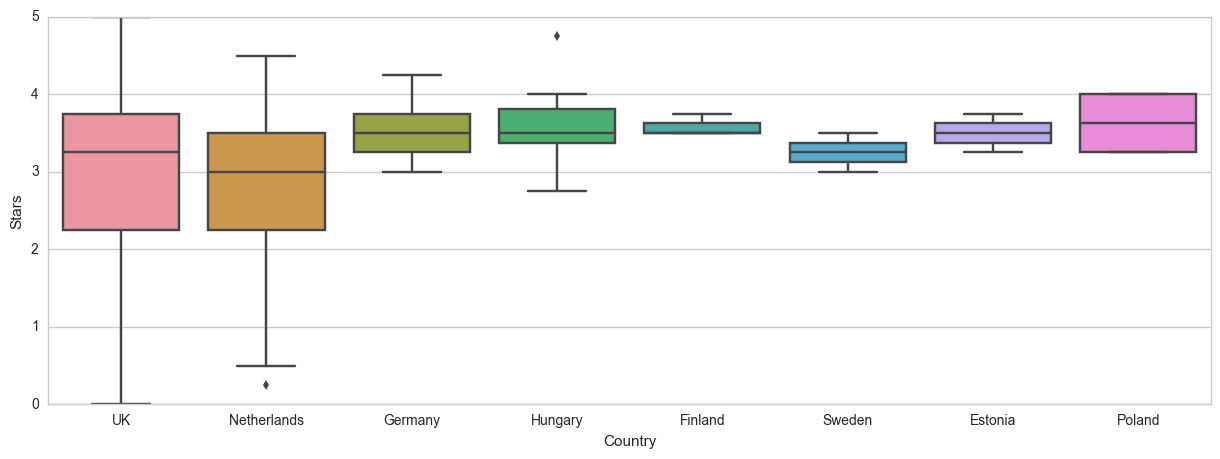

In [49]:
# Europe BoxPlot
plt.rcParams['figure.figsize']=15,5
sns.boxplot(x="Country", y="Stars", data=reurope)

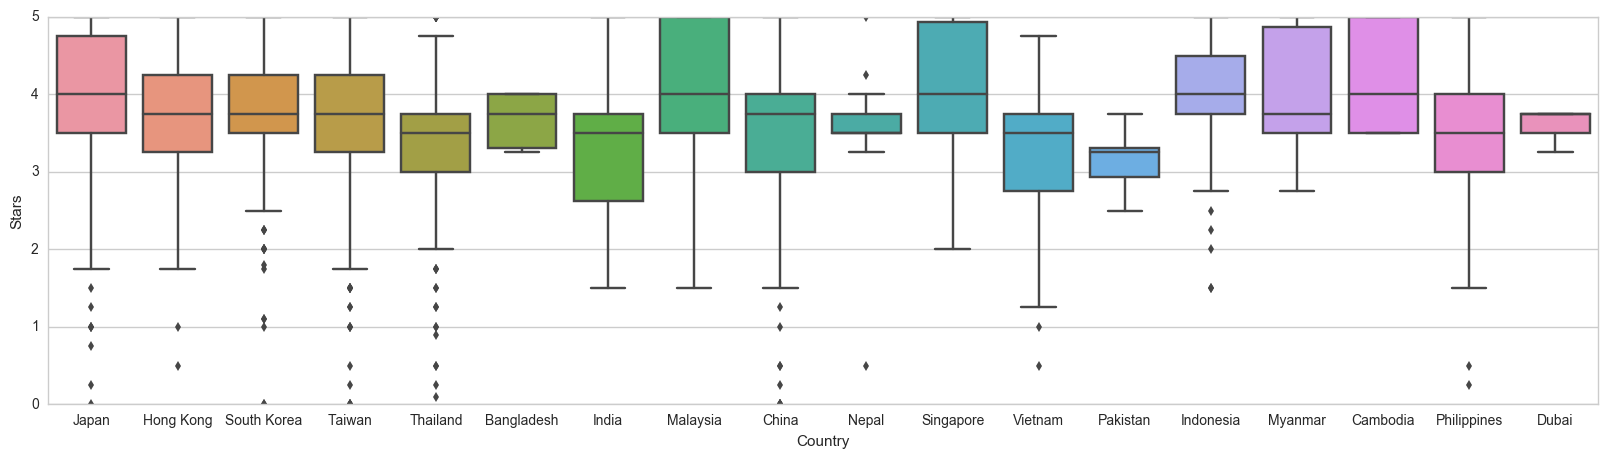

In [50]:
#Asia BoxPlot

plt.rcParams['figure.figsize']=20,5
sns.boxplot(x="Country", y="Stars", data=rasia)

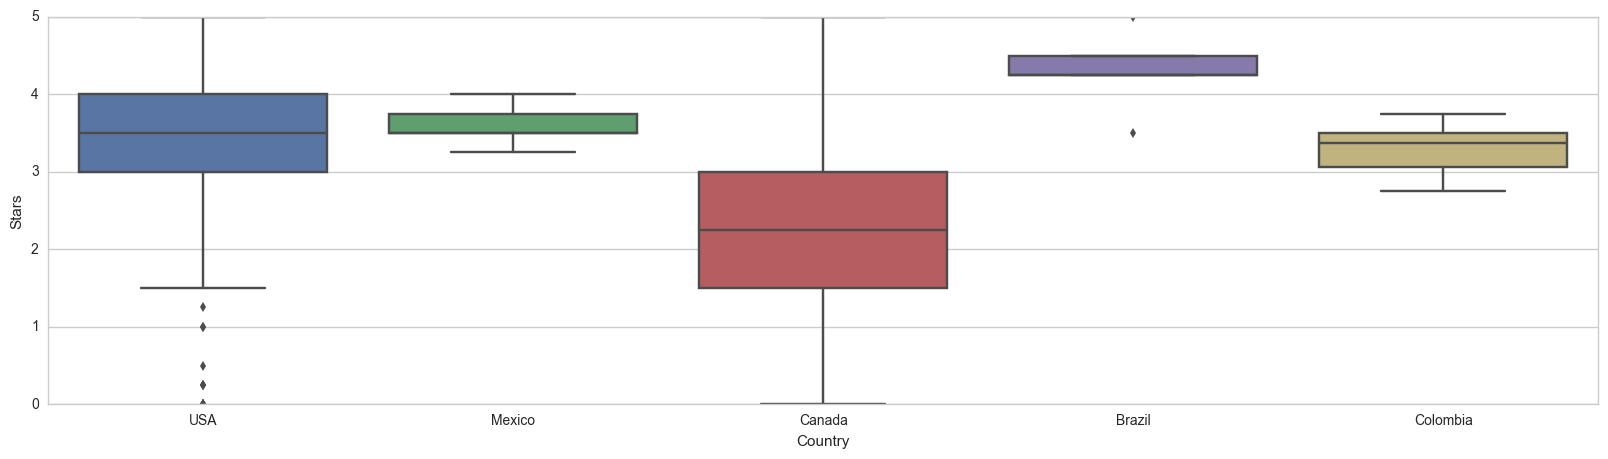

In [51]:
#Americas BoxPlot
sns.boxplot(x="Country", y="Stars", data=ramericas)

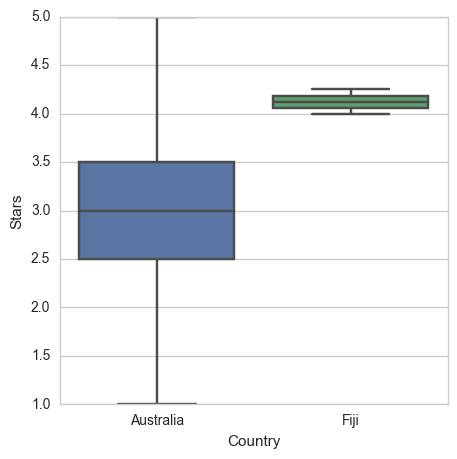

In [52]:
#Oceana Boxplot
plt.rcParams['figure.figsize']=5,5
sns.boxplot(x="Country", y="Stars", data=roceania)

In [53]:
# Looking at Top Ten brands reviewed
Ramen['Brand'].value_counts()[:10]

Nissin          309
Nongshim         92
Maruchan         74
Mama             71
Paldo            62
Myojo            61
Indomie          50
Ottogi           42
Lucky Me!        34
Vina Acecook     34
Name: Brand, dtype: int64

In [54]:
# Creating a Dataframe for the top ten.

rbrands = Ramen.loc[(Ramen['Brand'] == 'Nissin') | (Ramen['Brand'] == 'Nongshim') | (Ramen['Brand'] == 'Maruchan') | (Ramen['Brand'] == 'Mama')
                    | (Ramen['Brand'] == 'Paldo')| (Ramen['Brand'] == 'Myojo')| (Ramen['Brand'] == 'Indomie') | (Ramen['Brand'] == 'Ottogi') 
                      | (Ramen['Brand'] == 'Lucky Me!') | (Ramen['Brand'] == 'Vina Acecook') ]

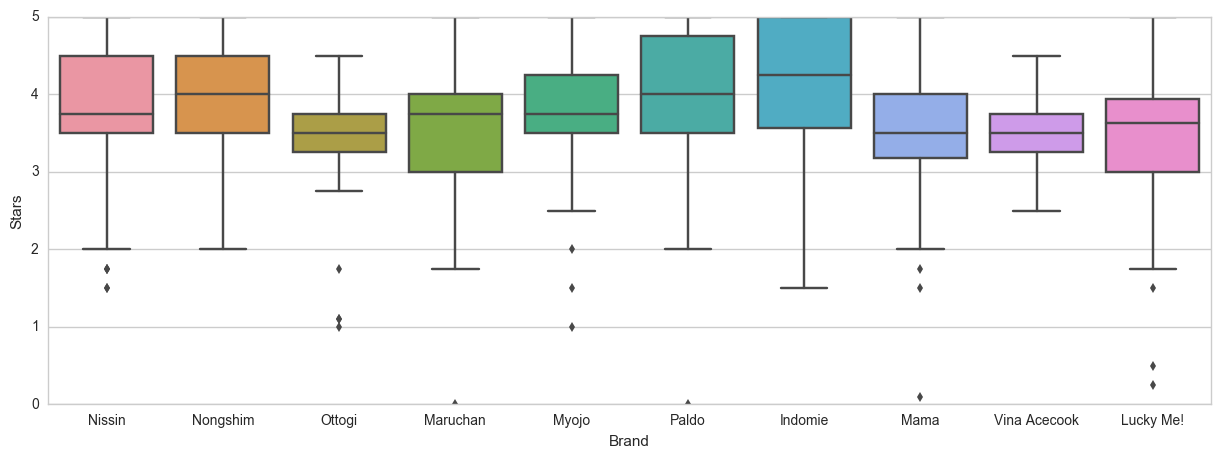

In [55]:
# Boxplot for the top ten most reviewed brands.

plt.rcParams['figure.figsize']=15,5
sns.boxplot(x="Brand", y="Stars", data=rbrands)

In [56]:
# Aggregating the mean rating and the review count.
rmean1 = Ramen.groupby('Brand')['Stars'].agg(['mean', 'count'])
print (rmean1)

                         mean  count
Brand                               
7 Select             3.625000      2
7 Select/Nissin      3.500000      1
A-One                2.750000      4
A-Sha Dry Noodle     4.076923     26
A1                   3.083333      3
ABC                  4.208333     12
Acecook              3.125000     10
Adabi                3.812500      4
Ah Lai               4.750000      2
Ajinatori            3.500000      1
Amianda              3.950000     10
Amino                3.500000      3
Annie Chun's         3.479167     12
Aroi                 4.500000      2
Asia Gold            3.437500      4
Asian Thai Foods     3.517857     14
Authentically Asian  1.000000      1
Azami                1.950000      5
Baijia               1.250000     11
Baixiang Noodles     3.700000      5
Baltix               3.500000      2
Bamee                3.300000      5
Batchelors           2.921875     16
Binh Tay             3.125000      2
Bon Go Jang          3.375000      2
B

In [57]:
#Sorting by the highest mean and picking the top 50
print(rmean1.sort_values(by='mean',ascending=False))[:50]

                          mean  count
Brand                                
Plats Du Chef         5.000000      1
Nyor Nyar             5.000000      2
Prima Taste           5.000000      7
Prima                 5.000000      3
The Bridge            5.000000      1
ChoripDong            5.000000      1
Torishi               5.000000      1
Komforte Chockolates  5.000000      1
MyOri                 5.000000      5
Foodmon               5.000000      2
Kimura                5.000000      1
Song Hak              5.000000      1
Daddy                 5.000000      1
Ogasawara             5.000000      1
ORee Garden           5.000000      1
Peyang                5.000000      1
Seven & I             5.000000      1
Happy Cook            5.000000      1
Higashi               5.000000      1
CarJEN                4.928571      7
MyKuali               4.921875     16
Nanyang Chef          4.875000      2
Tseng Noodles         4.821429      7
Mom's Dry Noodle      4.800000      5
Ah Lai      

In [58]:
# Reindex
rr1= rmean1.sort_values(by='mean',ascending=False)
rr1= rr1.reset_index()

In [59]:
# Excluded Brands which had less than 3 reviews
rr1.loc[rr1['count'] > 3, ['Brand','mean','count']][:10]

,Brand,mean,count
2,Prima Taste,5.000000,7
8,MyOri,5.000000,5
19,CarJEN,4.928571,7
20,MyKuali,4.921875,16
22,Tseng Noodles,4.821429,7
23,Mom's Dry Noodle,4.800000,5
35,New Touch,4.500000,6
37,Sun Noodle,4.464286,7
38,Yamachan,4.437500,8
39,Daikoku,4.437500,4
